# Load Package

In [1]:
import pandas as pd
import seaborn as sns
import datetime as datetime
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

# Load Dataset

In [2]:
train = pd.read_csv("train.csv", index_col="PassengerId")

print(train.shape)
train.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test = pd.read_csv("test.csv", index_col="PassengerId")

print(test.shape)
test.head()

(418, 10)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


1. 각 colomns에 해당하는 데이터 갯수가 최대 891개임.(test는 418개)
2. Age, Cabin, Embarked 의 경우 null 값이 존재하는 것으로 보임.
> - 해당 값에 대해 머신러닝을 활용하여 값을 채워 주는 것도 좋을 것으로 보임.
> - 단, 각 columns에 대한 데이터 특징을 알아야함.
> - Age의 경우, 나이가 연속적으로 나열되어 있는 것으로 Contiuous한 연속형 데이터로 볼 수 있고,
  Embarked의 경우, S C Q 로 나눠져 있는 Categorical한 분류형 데이터로 볼 수 있다는 점을 감안하여 머신러닝을 활용 해보자.

# Proprocessing & Analysis

In [6]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


**★drop**
- Cabin, Ticket columns 은 데이터수가 너무 부족하여 예측 및 실 사용이 어려울 것으로 판단됨으로 drop 시키고 시작

In [7]:
train = train.drop(columns = ["Ticket","Cabin"])

print(train.shape)
train.head()

(891, 9)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [8]:
test = test.drop(columns = ["Ticket","Cabin"])

print(test.shape)
test.head()

(418, 8)


,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


## 1. Name

In [9]:
train["Name"]

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

**이름이 가지는 특징 중 하나, 존칭으로 분류해보기**
- 'Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms', 'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess', 'Jonkheer', 

In [10]:
def get_title(name):
    
    return name.split(", ")[1].split('. ')[0]

train["Name"].apply(get_title).unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [11]:
train.loc[train["Name"].str.contains("Mr"), "name_title"] = "Mr"
train.loc[train["Name"].str.contains("Mrs"), "name_title"] = "Mrs"
train.loc[train["Name"].str.contains("Miss"), "name_title"] = "Miss"
train.loc[train["Name"].str.contains("Master"), "name_title"] = "Master"
train.loc[train["Name"].str.contains("Don"), "name_title"] = "Don"
train.loc[train["Name"].str.contains("Rev"), "name_title"] = "Rev"
train.loc[train["Name"].str.contains("Dr"), "name_title"] = "Dr"
train.loc[train["Name"].str.contains("Mme"), "name_title"] = "Mme"
train.loc[train["Name"].str.contains("Ms"), "name_title"] = "Ms"
train.loc[train["Name"].str.contains("Major"), "name_title"] = "Major"
train.loc[train["Name"].str.contains("Lady"), "name_title"] = "Lady"
train.loc[train["Name"].str.contains("Sir"), "name_title"] = "Sir"
train.loc[train["Name"].str.contains("Mlle"), "name_title"] = "Mlle"
train.loc[train["Name"].str.contains("Col"), "name_title"] = "Col"
train.loc[train["Name"].str.contains("Capt"), "name_title"] = "Capt"
train.loc[train["Name"].str.contains("the Countess"), "name_title"] = "the Countess"
train.loc[train["Name"].str.contains("Jonkheer"), "name_title"] = "Jonkheer"

print(train.shape)
train.head()

(891, 10)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,name_title
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [12]:
df_nametitle = pd.DataFrame(train["name_title"].value_counts()).reset_index()

Mr              506
Miss            180
Mrs             123
Master           40
Dr               11
Col              10
Rev               6
Sir               3
Mlle              2
Major             2
Don               2
Capt              1
Mme               1
Lady              1
Jonkheer          1
the Countess      1
Ms                1
Name: name_title, dtype: int64


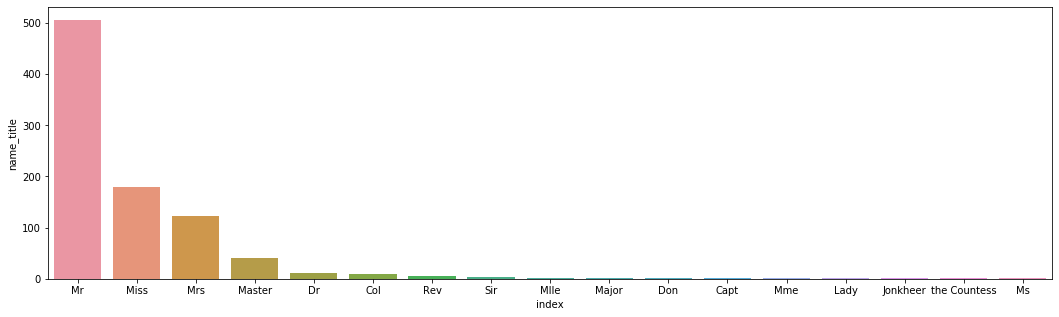

In [13]:
print(train["name_title"].value_counts())

plt.figure(figsize = (18,5))
sns.barplot(data=df_nametitle, x="index", y="name_title")

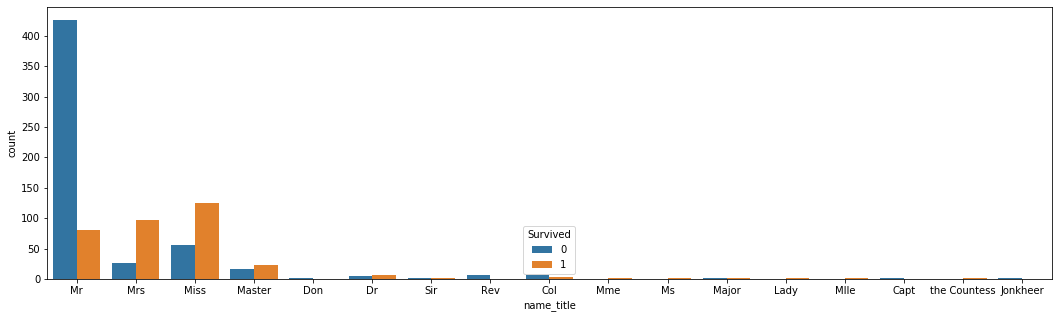

In [14]:
plt.figure(figsize = (18, 5))
sns.countplot(data=train, x="name_title", hue = "Survived")

- Mr의 생존율이 굉장히 낮은 것을 알 수 있다
- Mrs와 Miss의 생존율이 높다
- Master의 생존율이 높다
- Dr는 사망자보다 생존자가 조금 더 많은 것을 알 수 있다.

In [15]:
test["Name"]

PassengerId
892                                 Kelly, Mr. James
893                 Wilkes, Mrs. James (Ellen Needs)
894                        Myles, Mr. Thomas Francis
895                                 Wirz, Mr. Albert
896     Hirvonen, Mrs. Alexander (Helga E Lindqvist)
                            ...                     
1305                              Spector, Mr. Woolf
1306                    Oliva y Ocana, Dona. Fermina
1307                    Saether, Mr. Simon Sivertsen
1308                             Ware, Mr. Frederick
1309                        Peter, Master. Michael J
Name: Name, Length: 418, dtype: object

In [16]:
def get_title(name):
    
    return name.split(", ")[1].split('. ')[0]

test["Name"].apply(get_title).unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

- Don과 Dona는 같은 귀족직함으로 Dona를 Don으로 수정하여 분석한다.

In [17]:
test.loc[test["Name"].str.contains("Mr"), "name_title"] = "Mr"
test.loc[test["Name"].str.contains("Mrs"), "name_title"] = "Mrs"
test.loc[test["Name"].str.contains("Miss"), "name_title"] = "Miss"
test.loc[test["Name"].str.contains("Master"), "name_title"] = "Master"
test.loc[test["Name"].str.contains("Dona"), "name_title"] = "Don"
test.loc[test["Name"].str.contains("Col"), "name_title"] = "Col"
test.loc[test["Name"].str.contains("Dr"), "name_title"] = "Dr"
test.loc[test["Name"].str.contains("Rev"), "name_title"] = "Rev"
test.loc[test["Name"].str.contains("Ms"), "name_title"] = "Ms"

print(test.shape)
test.head()

(418, 9)


,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,name_title
PassengerId,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,Mr
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,Mrs
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,Mr
895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,Mr
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,Mrs


In [18]:
dftest_nametitle = pd.DataFrame(test["name_title"].value_counts()).reset_index()

    index  name_title
0      Mr         236
1    Miss          77
2     Mrs          69
3  Master          20
4      Dr           6
5     Col           5
6     Rev           2
7     Don           2
8      Ms           1


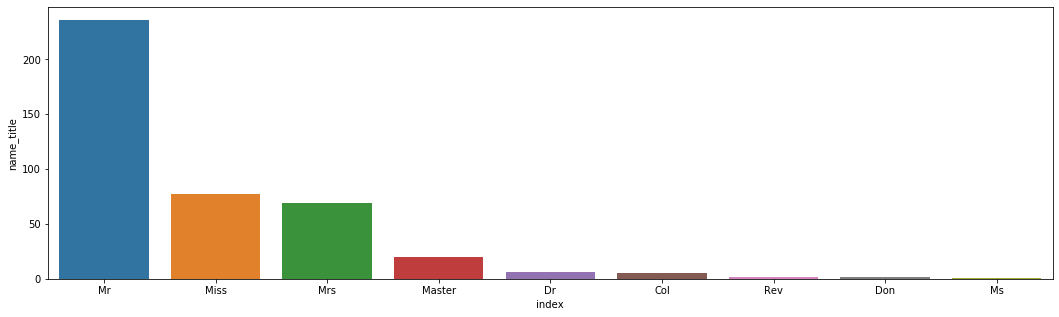

In [19]:
print(dftest_nametitle)

plt.figure(figsize = (18,5))
sns.barplot(data=dftest_nametitle, x="index", y="name_title")

## 2. Sex

In [20]:
train.loc[train["Sex"] == "male", "sex_code"] = 0
train.loc[train["Sex"] == "female", "sex_code"] = 1

print(train.shape)
train.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,name_title,sex_code
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr,0.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs,1.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss,1.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs,1.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr,0.0


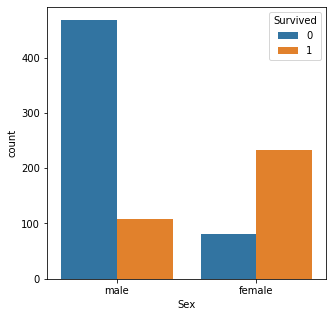

In [21]:
plt.figure(figsize= (5,5))
sns.countplot(data=train, x="Sex", hue="Survived")

In [22]:
test.loc[test["Sex"] == "male", "sex_code"] = 0
test.loc[test["Sex"] == "female", "sex_code"] = 1

print(test.shape)
test.head()

(418, 10)


,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,name_title,sex_code
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,Mr,0.0
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,Mrs,1.0
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,Mr,0.0
895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,Mr,0.0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,Mrs,1.0


## 3. SibSp + Parch = Family size

In [23]:
train["familysize"] = train["SibSp"] + train["Parch"] + 1

print(train.shape)
train.head()

(891, 12)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,name_title,sex_code,familysize
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr,0.0,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs,1.0,2
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss,1.0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs,1.0,2
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr,0.0,1


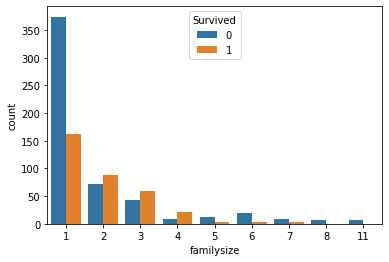

In [24]:
sns.countplot(data=train, x="familysize", hue="Survived")

- single은 절반이상이 사망한다.(생존율이 낮음)
- 2, 3, 4는 다소 생존율이 다소 높다고 판단된다.
- 5명 이상 가족은 생존율이 낮다고 판단된다.

- 1 = single
- 2:4 = nuclear
- 5~ = big

In [25]:
train.loc[train["familysize"] == 1, "family_snb"] = "single"
train.loc[(train["familysize"] > 1) & (train["familysize"] < 5), "family_snb"] = "nuclear"
train.loc[train["familysize"] >= 5, "family_snb"] = "big"

print(train.shape)
train.head()

(891, 13)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,name_title,sex_code,familysize,family_snb
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr,0.0,2,nuclear
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs,1.0,2,nuclear
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss,1.0,1,single
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs,1.0,2,nuclear
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr,0.0,1,single


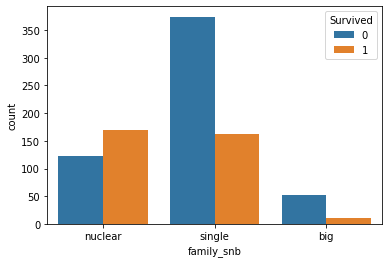

In [26]:
sns.countplot(data=train, x="family_snb", hue="Survived")

In [27]:
train["fam_single"] = train["familysize"] == 1
train["fam_nuclear"] = (train["familysize"] > 1) & (train["familysize"] < 5)
train["fam_big"] = train["familysize"] >= 5

print(train.shape)
train.head()

(891, 16)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,name_title,sex_code,familysize,family_snb,fam_single,fam_nuclear,fam_big
PassengerId,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr,0.0,2,nuclear,False,True,False
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs,1.0,2,nuclear,False,True,False
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss,1.0,1,single,True,False,False
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs,1.0,2,nuclear,False,True,False
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr,0.0,1,single,True,False,False


In [28]:
test["familysize"] = test["SibSp"] + test["Parch"] + 1

print(test.shape)
test.head()

(418, 11)


,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,name_title,sex_code,familysize
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,Mr,0.0,1
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,Mrs,1.0,2
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,Mr,0.0,1
895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,Mr,0.0,1
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,Mrs,1.0,3


In [29]:
test.loc[test["familysize"] == 1, "family_snb"] = "single"
test.loc[(test["familysize"] > 1) & (test["familysize"] < 5), "family_snb"] = "nuclear"
test.loc[test["familysize"] >= 5, "family_snb"] = "big"

print(test.shape)
test.head()

(418, 12)


,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,name_title,sex_code,familysize,family_snb
PassengerId,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,Mr,0.0,1,single
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,Mrs,1.0,2,nuclear
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,Mr,0.0,1,single
895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,Mr,0.0,1,single
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,Mrs,1.0,3,nuclear


In [30]:
test["fam_single"] = test["familysize"] == 1
test["fam_nuclear"] = (test["familysize"] > 1) & (test["familysize"] < 5)
test["fam_big"] = test["familysize"] >= 5

print(test.shape)
test.head()

(418, 15)


,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,name_title,sex_code,familysize,family_snb,fam_single,fam_nuclear,fam_big
PassengerId,,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,Mr,0.0,1,single,True,False,False
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,Mrs,1.0,2,nuclear,False,True,False
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,Mr,0.0,1,single,True,False,False
895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,Mr,0.0,1,single,True,False,False
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,Mrs,1.0,3,nuclear,False,True,False


## 4. Embarked

In [31]:
train[train["Embarked"].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,name_title,sex_code,familysize,family_snb,fam_single,fam_nuclear,fam_big
PassengerId,,,,,,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,80.0,NaN,Miss,1.0,1,single,True,False,False
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,80.0,NaN,Mrs,1.0,1,single,True,False,False


In [32]:
train["Embarked_fillin"] = train["Embarked"]
train.loc[train["Embarked_fillin"].isnull(), "Embarked_fillin"] = "C"

train[train["Embarked_fillin"].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,name_title,sex_code,familysize,family_snb,fam_single,fam_nuclear,fam_big,Embarked_fillin
PassengerId,,,,,,,,,,,,,,,,,


In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 17 columns):
Survived           891 non-null int64
Pclass             891 non-null int64
Name               891 non-null object
Sex                891 non-null object
Age                714 non-null float64
SibSp              891 non-null int64
Parch              891 non-null int64
Fare               891 non-null float64
Embarked           889 non-null object
name_title         891 non-null object
sex_code           891 non-null float64
familysize         891 non-null int64
family_snb         891 non-null object
fam_single         891 non-null bool
fam_nuclear        891 non-null bool
fam_big            891 non-null bool
Embarked_fillin    891 non-null object
dtypes: bool(3), float64(3), int64(5), object(6)
memory usage: 147.0+ KB


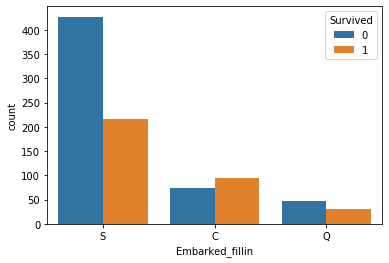

In [34]:
sns.countplot(data=train, x="Embarked_fillin", hue="Survived")

In [35]:
train["Embarked_fillin_S"] = train["Embarked_fillin"] == "S"
train["Embarked_fillin_C"] = train["Embarked_fillin"] == "C"
train["Embarked_fillin_Q"] = train["Embarked_fillin"] == "Q"

print(train.shape)
train.head()

(891, 20)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,name_title,sex_code,familysize,family_snb,fam_single,fam_nuclear,fam_big,Embarked_fillin,Embarked_fillin_S,Embarked_fillin_C,Embarked_fillin_Q
PassengerId,,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr,0.0,2,nuclear,False,True,False,S,True,False,False
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs,1.0,2,nuclear,False,True,False,C,False,True,False
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss,1.0,1,single,True,False,False,S,True,False,False
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs,1.0,2,nuclear,False,True,False,S,True,False,False
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr,0.0,1,single,True,False,False,S,True,False,False


In [36]:
test["Embarked_fillin"] = test["Embarked"]

test[test["Embarked_fillin"].isnull()]



# test["Embarked_fillin"] = test["Embarked"]
# test.loc[test["Embarked"].isnull(), "Embarked_fillin"] = "C"

# print(test.shape)
# test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,name_title,sex_code,familysize,family_snb,fam_single,fam_nuclear,fam_big,Embarked_fillin
PassengerId,,,,,,,,,,,,,,,,


In [37]:
test["Embarked_fillin_S"] = test["Embarked_fillin"] == "S"
test["Embarked_fillin_C"] = test["Embarked_fillin"] == "C"
test["Embarked_fillin_Q"] = test["Embarked_fillin"] == "Q"

print(test.shape)
test.head()

(418, 19)


,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,name_title,sex_code,familysize,family_snb,fam_single,fam_nuclear,fam_big,Embarked_fillin,Embarked_fillin_S,Embarked_fillin_C,Embarked_fillin_Q
PassengerId,,,,,,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,Mr,0.0,1,single,True,False,False,Q,False,False,True
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,Mrs,1.0,2,nuclear,False,True,False,S,True,False,False
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,Mr,0.0,1,single,True,False,False,Q,False,False,True
895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,Mr,0.0,1,single,True,False,False,S,True,False,False
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,Mrs,1.0,3,nuclear,False,True,False,S,True,False,False


In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 20 columns):
Survived             891 non-null int64
Pclass               891 non-null int64
Name                 891 non-null object
Sex                  891 non-null object
Age                  714 non-null float64
SibSp                891 non-null int64
Parch                891 non-null int64
Fare                 891 non-null float64
Embarked             889 non-null object
name_title           891 non-null object
sex_code             891 non-null float64
familysize           891 non-null int64
family_snb           891 non-null object
fam_single           891 non-null bool
fam_nuclear          891 non-null bool
fam_big              891 non-null bool
Embarked_fillin      891 non-null object
Embarked_fillin_S    891 non-null bool
Embarked_fillin_C    891 non-null bool
Embarked_fillin_Q    891 non-null bool
dtypes: bool(6), float64(3), int64(5), object(6)
memory usage: 149.6+ KB


In [39]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 19 columns):
Pclass               418 non-null int64
Name                 418 non-null object
Sex                  418 non-null object
Age                  332 non-null float64
SibSp                418 non-null int64
Parch                418 non-null int64
Fare                 417 non-null float64
Embarked             418 non-null object
name_title           418 non-null object
sex_code             418 non-null float64
familysize           418 non-null int64
family_snb           418 non-null object
fam_single           418 non-null bool
fam_nuclear          418 non-null bool
fam_big              418 non-null bool
Embarked_fillin      418 non-null object
Embarked_fillin_S    418 non-null bool
Embarked_fillin_C    418 non-null bool
Embarked_fillin_Q    418 non-null bool
dtypes: bool(6), float64(3), int64(4), object(6)
memory usage: 48.2+ KB


## 5. Fare

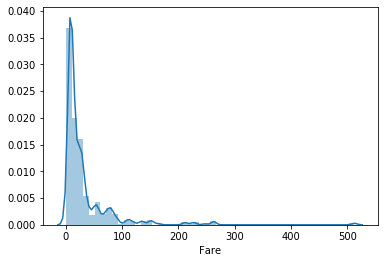

In [40]:
sns.distplot(train["Fare"])

In [41]:
train[train["Fare"].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,name_title,sex_code,familysize,family_snb,fam_single,fam_nuclear,fam_big,Embarked_fillin,Embarked_fillin_S,Embarked_fillin_C,Embarked_fillin_Q
PassengerId,,,,,,,,,,,,,,,,,,,,


In [42]:
train["Rev_Fare"] = train["Fare"]

In [43]:
test[test["Fare"].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,name_title,sex_code,familysize,family_snb,fam_single,fam_nuclear,fam_big,Embarked_fillin,Embarked_fillin_S,Embarked_fillin_C,Embarked_fillin_Q
PassengerId,,,,,,,,,,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,NaN,S,Mr,0.0,1,single,True,False,False,S,True,False,False


In [44]:
test["Rev_Fare"] = test["Fare"]

test.loc[test["Fare"].isnull(), "Rev_Fare"] = 0

In [45]:
test[test["Rev_Fare"].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,name_title,sex_code,familysize,family_snb,fam_single,fam_nuclear,fam_big,Embarked_fillin,Embarked_fillin_S,Embarked_fillin_C,Embarked_fillin_Q,Rev_Fare
PassengerId,,,,,,,,,,,,,,,,,,,,


In [46]:
print(test.shape)
test.head()

(418, 20)


,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,name_title,sex_code,familysize,family_snb,fam_single,fam_nuclear,fam_big,Embarked_fillin,Embarked_fillin_S,Embarked_fillin_C,Embarked_fillin_Q,Rev_Fare
PassengerId,,,,,,,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,Mr,0.0,1,single,True,False,False,Q,False,False,True,7.8292
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,Mrs,1.0,2,nuclear,False,True,False,S,True,False,False,7.0000
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,Mr,0.0,1,single,True,False,False,Q,False,False,True,9.6875
895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,Mr,0.0,1,single,True,False,False,S,True,False,False,8.6625
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,Mrs,1.0,3,nuclear,False,True,False,S,True,False,False,12.2875


In [47]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 20 columns):
Pclass               418 non-null int64
Name                 418 non-null object
Sex                  418 non-null object
Age                  332 non-null float64
SibSp                418 non-null int64
Parch                418 non-null int64
Fare                 417 non-null float64
Embarked             418 non-null object
name_title           418 non-null object
sex_code             418 non-null float64
familysize           418 non-null int64
family_snb           418 non-null object
fam_single           418 non-null bool
fam_nuclear          418 non-null bool
fam_big              418 non-null bool
Embarked_fillin      418 non-null object
Embarked_fillin_S    418 non-null bool
Embarked_fillin_C    418 non-null bool
Embarked_fillin_Q    418 non-null bool
Rev_Fare             418 non-null float64
dtypes: bool(6), float64(4), int64(4), object(6)
memory usage: 51.4+ KB


##  6. Age

In [48]:
train["Age"]

PassengerId
1      22.0
2      38.0
3      26.0
4      35.0
5      35.0
       ... 
887    27.0
888    19.0
889     NaN
890    26.0
891    32.0
Name: Age, Length: 891, dtype: float64

In [49]:
train["Age_fillin"] = train["Age"]

train.loc[train["Age_fillin"].isnull(), "Age_fillin"] = 0

train["Age_fillin"].value_counts()

0.00     177
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
36.50      1
55.50      1
66.00      1
23.50      1
0.42       1
Name: Age_fillin, Length: 89, dtype: int64

In [50]:
test["Age_fillin"] = test["Age"]

In [51]:
test[test["Age_fillin"] == 0]

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,name_title,sex_code,...,family_snb,fam_single,fam_nuclear,fam_big,Embarked_fillin,Embarked_fillin_S,Embarked_fillin_C,Embarked_fillin_Q,Rev_Fare,Age_fillin
PassengerId,,,,,,,,,,,,,,,,,,,,,


In [52]:
train[train["Age_fillin"] == 0].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,name_title,...,family_snb,fam_single,fam_nuclear,fam_big,Embarked_fillin,Embarked_fillin_S,Embarked_fillin_C,Embarked_fillin_Q,Rev_Fare,Age_fillin
PassengerId,,,,,,,,,,,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q,Mr,...,single,True,False,False,Q,False,False,True,8.4583,0.0
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,13.0000,S,Mr,...,single,True,False,False,S,True,False,False,13.0000,0.0
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,7.2250,C,Mrs,...,single,True,False,False,C,False,True,False,7.2250,0.0
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,7.2250,C,Mr,...,single,True,False,False,C,False,True,False,7.2250,0.0
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,7.8792,Q,Miss,...,single,True,False,False,Q,False,False,True,7.8792,0.0


In [53]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 22 columns):
Survived             891 non-null int64
Pclass               891 non-null int64
Name                 891 non-null object
Sex                  891 non-null object
Age                  714 non-null float64
SibSp                891 non-null int64
Parch                891 non-null int64
Fare                 891 non-null float64
Embarked             889 non-null object
name_title           891 non-null object
sex_code             891 non-null float64
familysize           891 non-null int64
family_snb           891 non-null object
fam_single           891 non-null bool
fam_nuclear          891 non-null bool
fam_big              891 non-null bool
Embarked_fillin      891 non-null object
Embarked_fillin_S    891 non-null bool
Embarked_fillin_C    891 non-null bool
Embarked_fillin_Q    891 non-null bool
Rev_Fare             891 non-null float64
Age_fillin           891 non-null float64
dtype

In [54]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'name_title', 'sex_code', 'familysize', 'family_snb',
       'fam_single', 'fam_nuclear', 'fam_big', 'Embarked_fillin',
       'Embarked_fillin_S', 'Embarked_fillin_C', 'Embarked_fillin_Q',
       'Rev_Fare', 'Age_fillin'],
      dtype='object')

In [55]:
test.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'name_title', 'sex_code', 'familysize', 'family_snb', 'fam_single',
       'fam_nuclear', 'fam_big', 'Embarked_fillin', 'Embarked_fillin_S',
       'Embarked_fillin_C', 'Embarked_fillin_Q', 'Rev_Fare', 'Age_fillin'],
      dtype='object')

In [56]:
from sklearn.ensemble import RandomForestClassifier

def Predict_Age(data):
    
    # 피처 설정
    features = ["Pclass", "sex_code",
                "Rev_Fare", "familysize", 
                "Embarked_fillin_S", "Embarked_fillin_Q" , "Embarked_fillin_C", 
                "fam_single", "fam_nuclear", "fam_big"]
    
    # 예상값 넣어줄 프레임 만들기
    Age_0 = data.loc[data["Age_fillin"] == 0].copy()
    Age_Not0 = data.loc[data["Age_fillin"] != 0].copy()
    
    # 타입 str로 변경해주기
    Age_Not0["Age_fillin"] = Age_Not0["Age_fillin"].astype("str") 
    
    # 모델 만들기
    model = RandomForestClassifier(n_estimators = 100, 
                                  n_jobs = -1, 
                                  random_state = 88)
    #fit
    model.fit(Age_Not0[features], Age_Not0["Age_fillin"])
    
    #predict
    M_Age_0 = model.predict(Age_0[features])
    
    Pd_Age_0 = Age_0
    Pd_Age_Not0 = Age_Not0
    
    Pd_Age_0["Pd_Age"] = M_Age_0
    Pd_Age_Not0["Pd_Age"] = Age_Not0["Age_fillin"].copy()
    
    data = Pd_Age_Not0.append(Pd_Age_0)
    
    data["Pd_Age"] = data["Pd_Age"].astype('float') 
    data.sort_index()
    
    return data.sort_index()

In [57]:
train = Predict_Age(train)

In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 23 columns):
Survived             891 non-null int64
Pclass               891 non-null int64
Name                 891 non-null object
Sex                  891 non-null object
Age                  714 non-null float64
SibSp                891 non-null int64
Parch                891 non-null int64
Fare                 891 non-null float64
Embarked             889 non-null object
name_title           891 non-null object
sex_code             891 non-null float64
familysize           891 non-null int64
family_snb           891 non-null object
fam_single           891 non-null bool
fam_nuclear          891 non-null bool
fam_big              891 non-null bool
Embarked_fillin      891 non-null object
Embarked_fillin_S    891 non-null bool
Embarked_fillin_C    891 non-null bool
Embarked_fillin_Q    891 non-null bool
Rev_Fare             891 non-null float64
Age_fillin           891 non-null object
Pd_Age

C:\Users\Johns\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Johns\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\Johns\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Johns\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


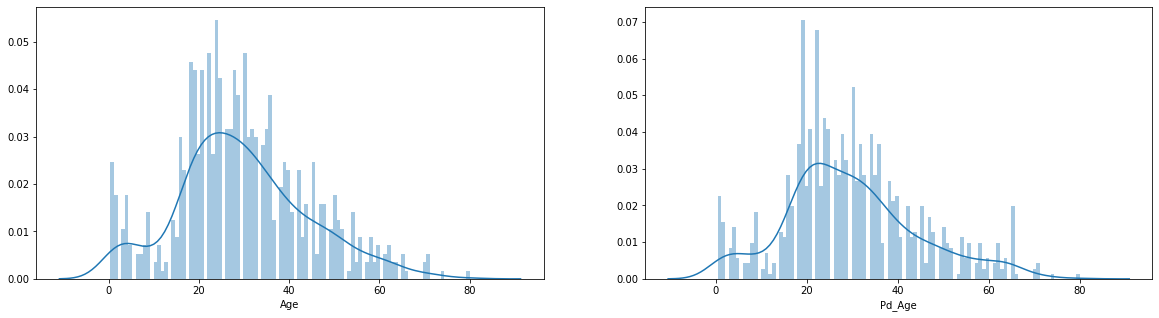

In [59]:
figure, (ax1, ax2)=plt.subplots(ncols=2)
figure.set_size_inches(20, 5)

sns.distplot(train["Age"], ax=ax1, bins = 100)
sns.distplot(train["Pd_Age"], ax=ax2, bins = 100)

In [60]:
test["Pd_Age"] = test["Age"]

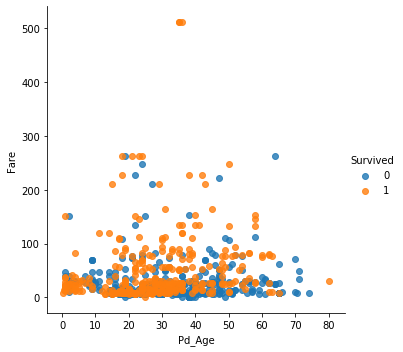

In [61]:
sns.lmplot(data=train, x="Pd_Age", y="Fare", hue="Survived", fit_reg=False)

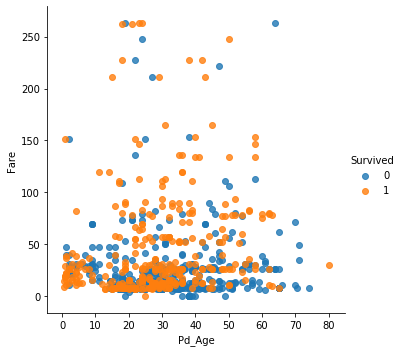

In [62]:
expectoutlier = train[train["Fare"] < 500]

sns.lmplot(data=expectoutlier, x="Pd_Age", y="Fare", hue = "Survived", fit_reg=False)

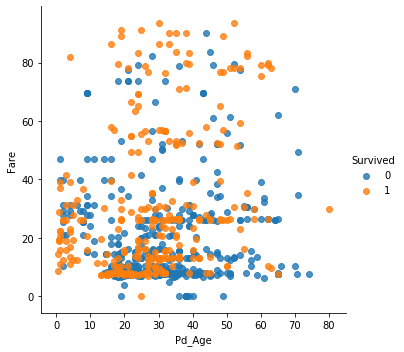

In [63]:
expectoutlier = train[train["Fare"] < 100]

sns.lmplot(data=expectoutlier, x="Pd_Age", y="Fare", hue = "Survived", fit_reg=False)

- 15세 미만 youngman
- 15세 에서 35세 middleman
- 35세 이상 oldman

In [64]:
train.loc[train["Pd_Age"] < 15, "age_division"] = "child" 
train.loc[(train["Pd_Age"] >= 15) & (train["Pd_Age"] < 35), "age_division"] = "young" 
train.loc[train["Pd_Age"] >= 35, "age_division"] = "old" 

print(train.shape)
train.head()

(891, 24)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,name_title,...,fam_nuclear,fam_big,Embarked_fillin,Embarked_fillin_S,Embarked_fillin_C,Embarked_fillin_Q,Rev_Fare,Age_fillin,Pd_Age,age_division
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr,...,True,False,S,True,False,False,7.2500,22.0,22.0,young
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs,...,True,False,C,False,True,False,71.2833,38.0,38.0,old
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss,...,False,False,S,True,False,False,7.9250,26.0,26.0,young
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs,...,True,False,S,True,False,False,53.1000,35.0,35.0,old
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr,...,False,False,S,True,False,False,8.0500,35.0,35.0,old


In [65]:
test.loc[test["Pd_Age"] < 15, "age_division"] = "child" 
test.loc[(test["Pd_Age"] >= 15) & (test["Pd_Age"] < 35), "age_division"] = "young" 
test.loc[test["Pd_Age"] >= 35, "age_division"] = "old" 

print(test.shape)
test.head()

(418, 23)


,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,name_title,sex_code,...,fam_nuclear,fam_big,Embarked_fillin,Embarked_fillin_S,Embarked_fillin_C,Embarked_fillin_Q,Rev_Fare,Age_fillin,Pd_Age,age_division
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,Mr,0.0,...,False,False,Q,False,False,True,7.8292,34.5,34.5,young
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,Mrs,1.0,...,True,False,S,True,False,False,7.0000,47.0,47.0,old
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,Mr,0.0,...,False,False,Q,False,False,True,9.6875,62.0,62.0,old
895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,Mr,0.0,...,False,False,S,True,False,False,8.6625,27.0,27.0,young
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,Mrs,1.0,...,True,False,S,True,False,False,12.2875,22.0,22.0,young


In [66]:
train["age_child"] = train["age_division"] == "child"
train["age_young"] = train["age_division"] == "young"
train["age_old"] = train["age_division"] == "old"

print(train.shape)
train.head()

(891, 27)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,name_title,...,Embarked_fillin_S,Embarked_fillin_C,Embarked_fillin_Q,Rev_Fare,Age_fillin,Pd_Age,age_division,age_child,age_young,age_old
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr,...,True,False,False,7.2500,22.0,22.0,young,False,True,False
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs,...,False,True,False,71.2833,38.0,38.0,old,False,False,True
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss,...,True,False,False,7.9250,26.0,26.0,young,False,True,False
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs,...,True,False,False,53.1000,35.0,35.0,old,False,False,True
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr,...,True,False,False,8.0500,35.0,35.0,old,False,False,True


In [67]:
test["age_child"] = test["age_division"] == "child"
test["age_young"] = test["age_division"] == "young"
test["age_old"] = test["age_division"] == "old"

print(test.shape)
test.head()

(418, 26)


,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,name_title,sex_code,...,Embarked_fillin_S,Embarked_fillin_C,Embarked_fillin_Q,Rev_Fare,Age_fillin,Pd_Age,age_division,age_child,age_young,age_old
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,Mr,0.0,...,False,False,True,7.8292,34.5,34.5,young,False,True,False
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,Mrs,1.0,...,True,False,False,7.0000,47.0,47.0,old,False,False,True
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,Mr,0.0,...,False,False,True,9.6875,62.0,62.0,old,False,False,True
895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,Mr,0.0,...,True,False,False,8.6625,27.0,27.0,young,False,True,False
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,Mrs,1.0,...,True,False,False,12.2875,22.0,22.0,young,False,True,False


# Additional Encode

In [68]:
train["name_title"]

PassengerId
1        Mr
2       Mrs
3      Miss
4       Mrs
5        Mr
       ... 
887     Rev
888    Miss
889    Miss
890      Mr
891      Mr
Name: name_title, Length: 891, dtype: object

In [69]:
train["name_title_Mr"] = train["name_title"] == "Mr"
train["name_title_Miss"] = train["name_title"] == "Miss"
train["name_title_Mrs"] = train["name_title"] == "Mrs"
train["name_title_Master"] = train["name_title"] == "Master"
train["name_title_Dr"] = train["name_title"] == "Dr"

print(train.shape)
train[["name_title", "name_title_Mr", "name_title_Miss", "name_title_Mrs", "name_title_Master", "name_title_Dr"]].head()


(891, 32)


,name_title,name_title_Mr,name_title_Miss,name_title_Mrs,name_title_Master,name_title_Dr
PassengerId,,,,,,
1,Mr,True,False,False,False,False
2,Mrs,False,False,True,False,False
3,Miss,False,True,False,False,False
4,Mrs,False,False,True,False,False
5,Mr,True,False,False,False,False


In [70]:
test["name_title_Mr"] = test["name_title"] == "Mr"
test["name_title_Miss"] = test["name_title"] == "Miss"
test["name_title_Mrs"] = test["name_title"] == "Mrs"
test["name_title_Master"] = test["name_title"] == "Master"
test["name_title_Dr"] = test["name_title"] == "Dr"

print(test.shape)
test[["name_title", "name_title_Mr", "name_title_Miss", "name_title_Mrs", "name_title_Master", "name_title_Dr"]].head()


(418, 31)


,name_title,name_title_Mr,name_title_Miss,name_title_Mrs,name_title_Master,name_title_Dr
PassengerId,,,,,,
892,Mr,True,False,False,False,False
893,Mrs,False,False,True,False,False
894,Mr,True,False,False,False,False
895,Mr,True,False,False,False,False
896,Mrs,False,False,True,False,False


In [71]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 32 columns):
Survived             891 non-null int64
Pclass               891 non-null int64
Name                 891 non-null object
Sex                  891 non-null object
Age                  714 non-null float64
SibSp                891 non-null int64
Parch                891 non-null int64
Fare                 891 non-null float64
Embarked             889 non-null object
name_title           891 non-null object
sex_code             891 non-null float64
familysize           891 non-null int64
family_snb           891 non-null object
fam_single           891 non-null bool
fam_nuclear          891 non-null bool
fam_big              891 non-null bool
Embarked_fillin      891 non-null object
Embarked_fillin_S    891 non-null bool
Embarked_fillin_C    891 non-null bool
Embarked_fillin_Q    891 non-null bool
Rev_Fare             891 non-null float64
Age_fillin           891 non-null object
Pd_Age

In [72]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 31 columns):
Pclass               418 non-null int64
Name                 418 non-null object
Sex                  418 non-null object
Age                  332 non-null float64
SibSp                418 non-null int64
Parch                418 non-null int64
Fare                 417 non-null float64
Embarked             418 non-null object
name_title           418 non-null object
sex_code             418 non-null float64
familysize           418 non-null int64
family_snb           418 non-null object
fam_single           418 non-null bool
fam_nuclear          418 non-null bool
fam_big              418 non-null bool
Embarked_fillin      418 non-null object
Embarked_fillin_S    418 non-null bool
Embarked_fillin_C    418 non-null bool
Embarked_fillin_Q    418 non-null bool
Rev_Fare             418 non-null float64
Age_fillin           332 non-null float64
Pd_Age               332 non-null float64


# Train

In [73]:
Features_name = ["Pclass", "sex_code", "Rev_Fare", "familysize",
                 "age_child", "age_young", "age_old", 
                 "Embarked_fillin_S", "Embarked_fillin_C", "Embarked_fillin_Q", 
                 "name_title_Master", "name_title_Dr", "name_title_Mr",
                 "fam_single", "fam_nuclear", "fam_big"]
# "Pclass","Sex_encode","Fare",
# "Embarked_C","Embarked_S","Embarked_Q",
# "AgeType_Y","AgeType_O","AgeType_M",
# "FamilyType_S","FamilyType_N","FamilyType_B"

Features_name

['Pclass',
 'sex_code',
 'Rev_Fare',
 'familysize',
 'age_child',
 'age_young',
 'age_old',
 'Embarked_fillin_S',
 'Embarked_fillin_C',
 'Embarked_fillin_Q',
 'name_title_Master',
 'name_title_Dr',
 'name_title_Mr',
 'fam_single',
 'fam_nuclear',
 'fam_big']

In [74]:
label_name = "Survived"
label_name 

'Survived'

In [75]:
X_train = train[Features_name]

print(X_train.shape)
X_train.head()

(891, 16)


,Pclass,sex_code,Rev_Fare,familysize,age_child,age_young,age_old,Embarked_fillin_S,Embarked_fillin_C,Embarked_fillin_Q,name_title_Master,name_title_Dr,name_title_Mr,fam_single,fam_nuclear,fam_big
PassengerId,,,,,,,,,,,,,,,,
1,3,0.0,7.2500,2,False,True,False,True,False,False,False,False,True,False,True,False
2,1,1.0,71.2833,2,False,False,True,False,True,False,False,False,False,False,True,False
3,3,1.0,7.9250,1,False,True,False,True,False,False,False,False,False,True,False,False
4,1,1.0,53.1000,2,False,False,True,True,False,False,False,False,False,False,True,False
5,3,0.0,8.0500,1,False,False,True,True,False,False,False,False,True,True,False,False


In [76]:
X_test = test[Features_name]

print(X_test.shape)
X_test.head()

(418, 16)


,Pclass,sex_code,Rev_Fare,familysize,age_child,age_young,age_old,Embarked_fillin_S,Embarked_fillin_C,Embarked_fillin_Q,name_title_Master,name_title_Dr,name_title_Mr,fam_single,fam_nuclear,fam_big
PassengerId,,,,,,,,,,,,,,,,
892,3,0.0,7.8292,1,False,True,False,False,False,True,False,False,True,True,False,False
893,3,1.0,7.0000,2,False,False,True,True,False,False,False,False,False,False,True,False
894,2,0.0,9.6875,1,False,False,True,False,False,True,False,False,True,True,False,False
895,3,0.0,8.6625,1,False,True,False,True,False,False,False,False,True,True,False,False
896,3,1.0,12.2875,3,False,True,False,True,False,False,False,False,False,False,True,False


In [77]:
y_train = train[label_name]

print(y_train)
y_train.head()

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64


PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64